# 1. Data Import & Exploration


## Load the large dataset


In [133]:
import pandas as pd
import numpy as np
fies_df = pd.read_csv('../datasets/fies_2023_volume1_494887610821.csv')
fies_df.sample(10)

C:\Users\Sara Limeta\AppData\Local\Temp\ipykernel_25312\915002061.py:3: DtypeWarning: Columns (77) have mixed types. Specify dtype option on import or set low_memory=False.
  fies_df = pd.read_csv('../datasets/fies_2023_volume1_494887610821.csv')


,RDMD_ID,Region,Province,Household ID,RECODED PROVINCE,Family Size,Salaries/Wages from Regular Employment,Salaries/Wages from Seasonal Employment,Income from Salaries and Wages,"Net Share of Crops, Fruits, etc. (Tot. Net Value of Share)",...,Raising Factor,Final Population Weights,Urban / Rural,Per Capita Income,NPCINC,RPCINC,Per Capita Income Decile (Province),pPCINC,Per Capita Income Decile (Region with Negros Island Region (NIR)),Region (with NIR)
100295,100296,12,63,100296,6300,2.0,0,18000,18000,0,...,178.967545,362.402344,2,51430.000000,4,5,5,5,5,12
41190,41191,5,41,41191,4100,2.0,124300,0,124300,0,...,131.732178,284.268311,2,69310.000000,5,7,8,8,7,5
53622,53623,6,79,53623,7900,6.0,81700,12100,93800,0,...,53.779464,325.387980,2,47816.667969,3,4,3,3,3,6
27454,27455,4,10,27455,1000,3.5,0,0,0,0,...,488.968353,1732.855896,1,158235.140625,9,8,8,8,8,4
79806,79807,9,97,79807,9700,4.0,192900,0,192900,0,...,36.068501,146.657425,1,54515.000000,4,6,5,5,6,9
85182,85183,10,35,85183,3500,4.0,0,0,0,6300,...,131.015625,541.276001,2,24075.500000,1,1,2,2,1,10
12742,12743,2,57,12743,5700,3.0,0,3600,3600,0,...,30.066050,98.526993,2,92536.335938,7,8,7,7,8,2
89054,89055,10,43,89055,4300,1.0,0,0,0,15000,...,136.266327,132.373932,2,119092.000000,8,9,8,9,9,10
71176,71177,8,64,71177,6400,1.5,0,40000,40000,0,...,65.301224,116.541321,2,109803.335938,8,9,8,8,9,8
152880,152881,16,68,152881,6800,2.0,0,0,0,16000,...,107.117706,210.173294,2,168262.500000,9,10,10,10,10,16


# 2. Identifying Data and Attributes


## List all column types and data types


In [134]:
# List all column types and data types
fies_df.dtypes

RDMD_ID                                                              int64
Region                                                               int64
Province                                                             int64
Household ID                                                         int64
RECODED PROVINCE                                                     int64
                                                                     ...  
RPCINC                                                               int64
Per Capita Income Decile (Province)                                  int64
pPCINC                                                               int64
Per Capita Income Decile (Region with Negros Island Region (NIR))    int64
Region (with NIR)                                                    int64
Length: 91, dtype: object

# 3. Determining the Type of Dataset


## Check if columns are numerical, categorical, or mixed.


In [135]:
for column in fies_df.columns:
    print(column, ':', pd.api.types.infer_dtype(fies_df[column]))

RDMD_ID : integer
Region : integer
Province : integer
Household ID : integer
RECODED PROVINCE : integer
Family Size : floating
Salaries/Wages from Regular Employment : integer
Salaries/Wages from Seasonal Employment : integer
Income from Salaries and Wages : integer
Net Share of Crops, Fruits, etc. (Tot. Net Value of Share) : integer
Cash Receipts, Support, etc. from Abroad : integer
Cash Receipts, Support, etc. from Domestic Source : integer
Rentals Received from Non-Agri Lands, etc. : integer
Unnamed: 13 : integer
Pension and Retirement Benefits : integer
Dividends from Investment : integer
Other Sources of Income NEC : integer
Family Sustenance Activities : integer
Total Received as Gifts : floating
Crop Farming and Gardening : integer
Livestock and Poultry Raising : integer
Fishing : integer
Forestry and Hunting : integer
Wholesale and Retail : integer
Manufacturing : integer
Transportation, Storage Services : integer
Entrep. Activities NEC : integer
Entrep. Activities NEC.1 : inte

## Making a Data Dictionary


In [136]:
fies_column_descriptions = {
    'RDMD_ID': 'Unique identifier for the record',
    'Region': 'Region code',
    'Province': 'Province code',
    'Household ID': 'Unique household identifier',
    'RECODED PROVINCE': 'Recoded province information',
    'Family Size': 'Number of people in the household',
    'Salaries/Wages from Regular Employment': 'Income from regular employment',
    'Salaries/Wages from Seasonal Employment': 'Income from seasonal employment',
    'Income from Salaries and Wages': 'Total income from salaries and wages',
    'Net Share of Crops, Fruits, etc. (Tot. Net Value of Share)': 'Net value from crop and fruit share',
    'Cash Receipts, Support, etc. from Abroad': 'Cash support received from abroad',
    'Cash Receipts, Support, etc. from Domestic Source': 'Cash support received domestically',
    'Rentals Received from Non-Agri Lands, etc.': 'Income from land rentals (non-agricultural)',
    'Unnamed: 13': 'Unknown or unnamed column',
    'Pension and Retirement Benefits': 'Income from pensions and retirement',
    'Dividends from Investment': 'Income from dividends',
    'Other Sources of Income NEC': 'Other sources of income not elsewhere classified',
    'Family Sustenance Activities': 'Income from family sustenance activities',
    'Total Received as Gifts': 'Total gifts received by the household',
    'Crop Farming and Gardening': 'Income from crop farming and gardening',
    'Livestock and Poultry Raising': 'Income from livestock and poultry raising',
    'Fishing': 'Income from fishing activities',
    'Forestry and Hunting': 'Income from forestry and hunting',
    'Wholesale and Retail': 'Income from wholesale and retail business',
    'Manufacturing': 'Income from manufacturing activities',
    'Transportation, Storage Services': 'Income from transportation and storage services',
    'Entrep. Activities NEC': 'Income from entrepreneurial activities (not elsewhere classified)',
    'Entrep. Activities NEC.1': 'Income from entrepreneurial activities (additional category 1)',
    'Entrep. Activities NEC.2': 'Income from entrepreneurial activities (additional category 2)',
    'Hhld, Income from Entrepreneurial Activities, Total': 'Total household income from entrepreneurial activities',
    'Losses from EA': 'Losses from entrepreneurial activities',
    'Cereal and Cereal Preparations (Total)': 'Expenditure on cereals and cereal preparations',
    'Meat and Meat Preparations': 'Expenditure on meat and meat preparations',
    'Fish and Marine Products (Total)': 'Expenditure on fish and marine products',
    'Dairy Products and Eggs (Total)': 'Expenditure on dairy products and eggs',
    'Oils and Fats (Total)': 'Expenditure on oils and fats',
    'Fruits and Vegetables': 'Expenditure on fruits and vegetables',
    'Vegetables (Total)': 'Expenditure on vegetables',
    'Sugar, Jam and Honey (Total)': 'Expenditure on sugar, jam, and honey',
    'Food Not Elsewhere Classified (Total)': 'Expenditure on other food items',
    'Fruit and vegetable juices': 'Expenditure on fruit and vegetable juices',
    'Coffee, Cocoa and Tea (Total)': 'Expenditure on coffee, cocoa, and tea',
    'Tea (total)  expenditure': 'Expenditure on tea',
    'Cocoa (total)  expenditure': 'Expenditure on cocoa',
    'Main Source of Water Supply (2nd visit only)': 'Main source of water supply (second visit)',
    'Softdrinks': 'Expenditure on soft drinks',
    'Other Non Alcoholic Beverages': 'Expenditure on other non-alcoholic beverages',
    'Alcoholic Beverages (Total)': 'Expenditure on alcoholic beverages',
    'Tobacco (Total)': 'Expenditure on tobacco products',
    'Other Vegetables (Total)': 'Expenditure on other types of vegetables',
    'Services_Primary_Goods': 'Expenditure on services and primary goods',
    'Alcohol Procduction Services': 'Expenditure on alcohol production services',
    'Total Food Consumed at Home (Total)': 'Total food consumed at home',
    'Food Regularly Consumed Outside The Home (Total)': 'Food consumed outside the home',
    'Hhld, Food': 'Household expenditure on food',
    'Clothing, Footwear and Other Wear': 'Expenditure on clothing, footwear, and other wear',
    'Housing and water (Total)': 'Expenditure on housing and water',
    'Actual House Rent': 'Expenditure on actual house rent',
    'Imputed House Rental Value': 'Imputed value of house rental',
    'Imputed Housing Benefit Rental Value': 'Imputed value of housing benefit rental',
    'House Rent/Rental Value': 'Expenditure on house rent/rental value',
    'Furnishings, Household Equipment & Routine Household Mainte': 'Expenditure on furnishings and household equipment',
    'Health (Total)': 'Expenditure on health services and products',
    'Transportation (Total)': 'Expenditure on transportation',
    'Communication (Total)': 'Expenditure on communication services',
    'Recreation and Culture (Total)': 'Expenditure on recreation and culture',
    'Education (Total)': 'Expenditure on education',
    'Insurance': 'Expenditure on insurance',
    'Miscellaneous Goods and Services (Total)': 'Expenditure on miscellaneous goods and services',
    'Durable Furniture': 'Expenditure on durable furniture',
    'Special Family Occasion': 'Expenditure on special family occasions',
    'Other Expenditure (inc. Value Consumed, Losses)': 'Other expenditures including losses',
    'Other Disbursements': 'Other household disbursements',
    'Accomodation Services': 'Expenditure on accommodation services',
    'Total Non-Food Expenditure': 'Total non-food expenditure',
    'Hhld, Income, Total': 'Total household income',
    'Hhld, Expenditures, Total': 'Total household expenditures',
    'Total Household Disbursements': 'Total household disbursements',
    'Other Receipts': 'Other household receipts',
    'Total Receipts': 'Total receipts',
    'Psu (Recode)': 'Primary Sampling Unit (recoded)',
    'Raising Factor': 'Raising factor for survey results',
    'Final Population Weights': 'Final weights for population data',
    'Urban / Rural': 'Urban or rural classification',
    'Per Capita Income': 'Household per capita income',
    'NPCINC': 'National per capita income',
    'RPCINC': 'Regional per capita income',
    'Per Capita Income Decile (Province)': 'Per capita income decile in the province',
    'pPCINC': 'Provincial per capita income decile',
    'Per Capita Income Decile (Region with Negros Island Region (NIR))': 'Per capita income decile (region with NIR)',
    'Region (with NIR)': 'Region code including NIR'
}


In [137]:
fies_derivations = {
    'Total Receipts': 'Total Household Income + Other Receipts',
    'Hhld, Income, Total': 'Net Share of Crops, Fruits, etc. + Cash Receipts, Support, etc. from Abroad + Cash Receipts, Support, etc. from Domestic Source + Unnamed + Pension and Retirement Benefits + Dividends from Investment + Other Sources of Income NEC + Family Sustenance Activities + Total Received as Gifts + Household, Income from Entrep Activities, Total + Imputed House Rental Value',
    'Hhld, Income from Entrepreneurial Activities, Total': 'Crop Farming and Gardening + Livestock and Poultry Raising + Fishing + Forestry and Hunting + Wholesale and Retail + Manufacturing + Transportation, Storage Services + Entrep. Activities NEC + Entrep. Activities NEC 1 + Entrep. Activities NEC 2',
    'Total Household Disbursements': 'Total Household Expenditure + Other Disbursements',
    'Hhld, Expenditures, Total': 'Household Food + Total Non-Food Expenditure',
    'Hhld, Food': 'Total Food Consumed at Home + Food Regularly Consumed Outside The Home',
    'Total Food Consumed at Home (Total)': 'Cereal and Cereal Preparations + Meat and Meat Preparations + Fish and Marine Products + Dairy and Eggs + Oils and Fats + Fruits and Vegetables + Vegetables + Sugar, jam and Honey + Food Not Elsewhere Classified + Fruit and Vegetable Juices + Coffee, Cocoa and Tea + Tea + Cocoa + Main Source of Water Supply + Softdrinks + Other Non Alcoholic Beverages',
    'Total Non-Food Expenditure': 'Alcoholic Beverages + Tobacco + Other Vegetables + Services_Primary_Goods + Alcoholic Production Services + Housing and water (Total) + Furnishings, Household Equipment & Routine Household Maintenance + Health + Transportation + Communication + Recreation and Culture + Education + Insurance + Miscellaneous Goods and Services + Durable Furniture + Special Family Occasion + Other Expenditure + Accommodation Services + Clothing, Footwear and Other Wear',
}


In [138]:
fies_volume1_data_dict = pd.DataFrame({
    'Column Name': fies_df.columns,
    'Data Type': fies_df.dtypes,
    'Non-Null Count': fies_df.notnull().sum(),
    'Unique Values': fies_df.nunique(),
    'Description': [fies_column_descriptions.get(col, 'No desciption available') for col in fies_df.columns],
    'Derivations from other columns': [fies_derivations.get(col, '') for col in fies_df.columns]
})
fies_volume1_data_dict.to_csv('../fies_volume1_data_dict.csv', index=False)

# 4. Data Quality and Assessment


## Check for missing values, duplicates, outliers, and wrong data.<b>


Check for duplicates


In [139]:
number_of_rows = fies_df.shape[0]

print(f"Number of rows: {number_of_rows}")

removed_duplicates = fies_df.copy()
removed_duplicates.drop_duplicates(inplace=True)

print(f"Number of rows after dropping duplicates: {removed_duplicates.shape[0]}")

Number of rows: 163268
Number of rows after dropping duplicates: 163268


No duplicates are found.


From the data dictionary, the Total Household Disbursements column is the only one with an object datatype, suggesting mixed values of numbers, strings, etc.


In [140]:
for column in removed_duplicates.columns:
    if removed_duplicates[column].isnull().any():
        print(f"Column {column} has missing values")

The code block above does not show any null values initially, therefore there is the possibility of data with only whitespace values. The code below will strip all whitespaces
to know the true number of missing values.


In [141]:
# Function to check if a value is whitespace or empty
def has_whitespace(val):
    return isinstance(val, str) and val.strip() == ''

whitespace_rows = removed_duplicates.map(has_whitespace).any(axis=1)

whitespace_count = whitespace_rows.sum()

print(f"Number of rows with whitespace: {whitespace_count}")

Number of rows with whitespace: 7732


There are whitespaces. Whitespaces could mean that the value for that data is zero. Therefore, a check must be made to ensure that there are zeroes in the dataset as well to know that whitespaces and zeroes are equivalent.


In [142]:
print(removed_duplicates['Total Household Disbursements'].value_counts().where(removed_duplicates['Total Household Disbursements'] == 0, 1).sum())

144056


Now we detect potential outliers using statistical methods.
The main columns to look at are the Total Household Income and Total Household Expenditure columns..


In [143]:
income_mean = removed_duplicates['Hhld, Income, Total'].mean()
income_median = removed_duplicates['Hhld, Income, Total'].median()
income_std = removed_duplicates['Hhld, Income, Total'].std()

print(f"Income Mean: {income_mean}")
print(f"Income Median: {income_median}")
print(f"Income Standard Deviation: {income_std}")

Income Mean: 332147.2798196217
Income Median: 241080.0
Income Standard Deviation: 406065.14044660714


In [144]:
expenditure_mean = removed_duplicates['Hhld, Expenditures, Total'].mean()
expenditure_median = removed_duplicates['Hhld, Expenditures, Total'].median()
expenditure_std = removed_duplicates['Hhld, Expenditures, Total'].std()

print(f"Expenditure Mean: {expenditure_mean}")
print(f"Expenditure Median: {expenditure_median}")
print(f"Expenditure Standard Deviation: {expenditure_std}")

Expenditure Mean: 243155.34994505966
Expenditure Median: 191325.25
Expenditure Standard Deviation: 195625.7027338354


From the results, the mean for the income and expenditure columns are quite large. To see more, a boxplot can be used to visualize the distribution


Text(0, 0.5, 'Value')

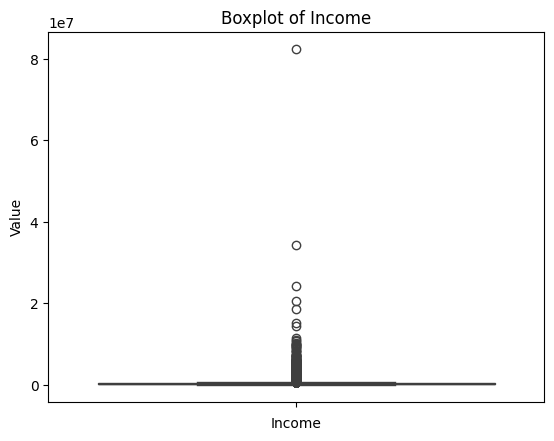

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(removed_duplicates['Hhld, Income, Total'])
plt.title('Boxplot of Income')
plt.xlabel('Income')
plt.ylabel('Value')

Text(0, 0.5, 'Value')

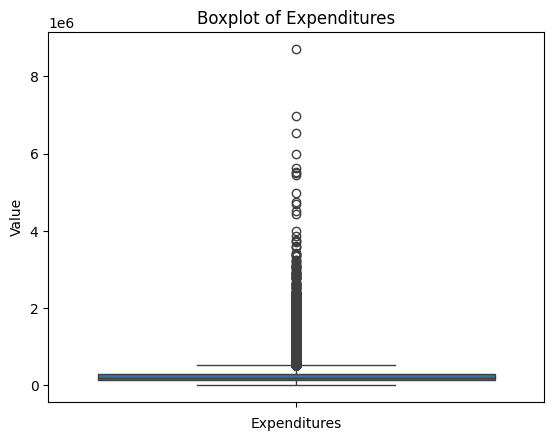

In [146]:
sns.boxplot(removed_duplicates['Hhld, Expenditures, Total'])
plt.title('Boxplot of Expenditures')
plt.xlabel('Expenditures')
plt.ylabel('Value')

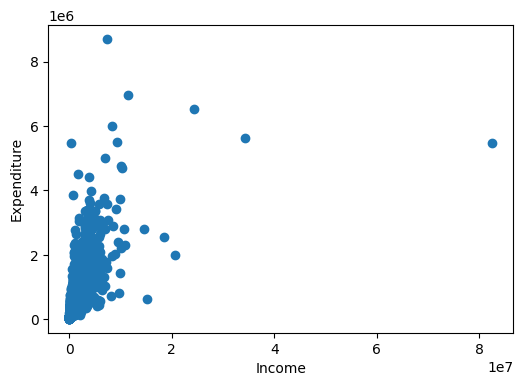

In [147]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(removed_duplicates['Hhld, Income, Total'], removed_duplicates['Hhld, Expenditures, Total'])
ax.set_xlabel('Income')
ax.set_ylabel('Expenditure')
plt.show()

From the boxplots and scatter plots, there defenitely are high-value outliers for both Income and Expenditure, and from the column derivations, this also means that by addressing only these two columns, the rest of the outlier columns can be addressed.


## Impute, discretize and data wrangling


Since there are zeroes present, the Total Household Disbursements column must be addressed. Upon inspection, Total Household Disbursements can be imputed from the sum of Hhld, Expenditures, Total and Other Disbursements.


In [148]:
removed_null = removed_duplicates.copy()
removed_null.loc[whitespace_rows, 'Total Household Disbursements'] = removed_null.loc[whitespace_rows, 
                                                                            'Hhld, Expenditures, Total'] + removed_null.loc[whitespace_rows, 'Other Disbursements']

Double-check for missing values


In [149]:
whitespace_rows = removed_null.map(has_whitespace).any(axis=1)
whitespace_count = whitespace_rows.sum()
print(f"Number of rows with whitespace: {whitespace_count}")

Number of rows with whitespace: 0


We now address the outliers using the IQR method


In [150]:
income_Q1 = removed_null['Hhld, Income, Total'].quantile(0.25)
income_Q3 = removed_null['Hhld, Income, Total'].quantile(0.75)
income_IQR = income_Q3 - income_Q1
print(f"Income Q1: {income_Q1}")
print(f"Income Q3: {income_Q3}")
print(f"Income IQR: {income_IQR}")

expenditure_Q1 = removed_null['Hhld, Expenditures, Total'].quantile(0.25)
expenditure_Q3 = removed_null['Hhld, Expenditures, Total'].quantile(0.75)
expenditure_IQR = expenditure_Q3 - expenditure_Q1
print(f"Expenditure Q1: {expenditure_Q1}")
print(f"Expenditure Q3: {expenditure_Q3}")
print(f"Expenditure IQR: {expenditure_IQR}")

Income Q1: 162539.0
Income Q3: 389478.0
Income IQR: 226939.0
Expenditure Q1: 131751.75
Expenditure Q3: 293141.125
Expenditure IQR: 161389.375


In [151]:
# Income
removed_outliers = removed_null.copy()
print('Shape before removing outliers:', removed_outliers.shape)
lower_bound_income = income_Q1 - 1.5 * income_IQR
upper_bound_income = income_Q3 + 1.5 * income_IQR
upper_income = np.where(removed_outliers['Hhld, Income, Total'] >= upper_bound_income)[0]
lower_income = np.where(removed_outliers['Hhld, Income, Total'] <= lower_bound_income)[0]

removed_outliers.drop(index=upper_income, inplace=True)
removed_outliers.drop(index=lower_income, inplace=True)
print('Shape after removing outliers for Income:', removed_outliers.shape)

# Expenditure
lower_bound_expenditure = expenditure_Q1 - 1.5 * expenditure_IQR
upper_bound_expenditure = expenditure_Q3 + 1.5 * expenditure_IQR
removed_outliers.reset_index(drop=True, inplace=True)
upper_expenditure = np.where(removed_outliers['Hhld, Expenditures, Total'] >= upper_bound_expenditure)[0]
lower_expenditure = np.where(removed_outliers['Hhld, Expenditures, Total'] <= lower_bound_expenditure)[0]

removed_outliers.drop(index=upper_expenditure, inplace=True)
removed_outliers.drop(index=lower_expenditure, inplace=True)
print('Shape after removing outliers for Expenditure:', removed_outliers.shape)

Shape before removing outliers: (163268, 91)
Shape after removing outliers for Income: (151704, 91)
Shape after removing outliers for Expenditure: (149622, 91)


Time to check using the same methods.


In [152]:
income_mean = removed_outliers['Hhld, Income, Total'].mean()
income_median = removed_outliers['Hhld, Income, Total'].median()
income_std = removed_outliers['Hhld, Income, Total'].std()

print(f"Income Mean: {income_mean}")
print(f"Income Median: {income_median}")
print(f"Income Standard Deviation: {income_std}")

expenditure_mean = removed_outliers['Hhld, Expenditures, Total'].mean()
expenditure_median = removed_outliers['Hhld, Expenditures, Total'].median()
expenditure_std = removed_outliers['Hhld, Expenditures, Total'].std()

print(f"Expenditure Mean: {expenditure_mean}")
print(f"Expenditure Median: {expenditure_median}")
print(f"Expenditure Standard Deviation: {expenditure_std}")

Income Mean: 262455.5624159549
Income Median: 225647.25
Income Standard Deviation: 142442.89244017968
Expenditure Mean: 202702.7845026133
Expenditure Median: 179935.75
Expenditure Standard Deviation: 101436.79255052749


Text(0, 0.5, 'Value')

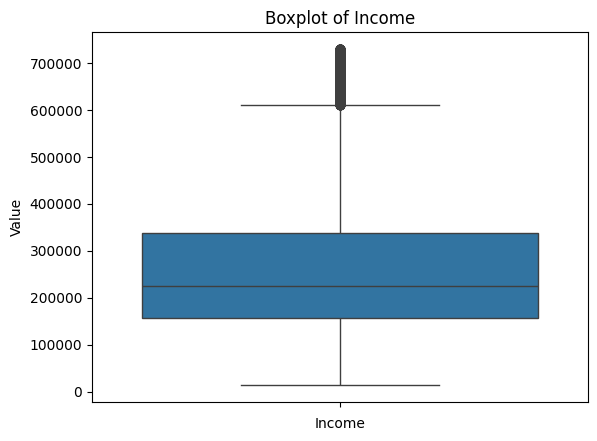

In [153]:
sns.boxplot(removed_outliers['Hhld, Income, Total'])
plt.title('Boxplot of Income')
plt.xlabel('Income')
plt.ylabel('Value')

Text(0, 0.5, 'Value')

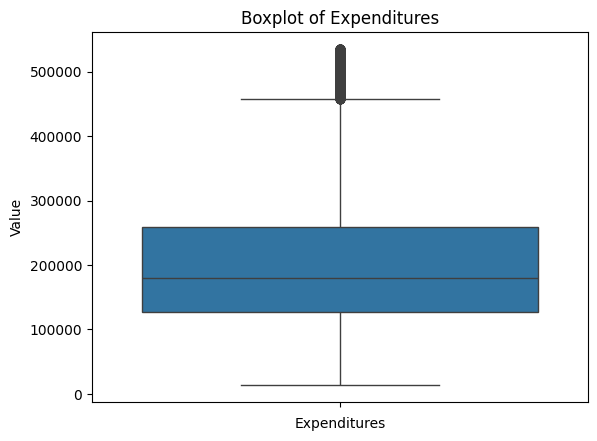

In [154]:
sns.boxplot(removed_outliers['Hhld, Expenditures, Total'])
plt.title('Boxplot of Expenditures')
plt.xlabel('Expenditures')
plt.ylabel('Value')

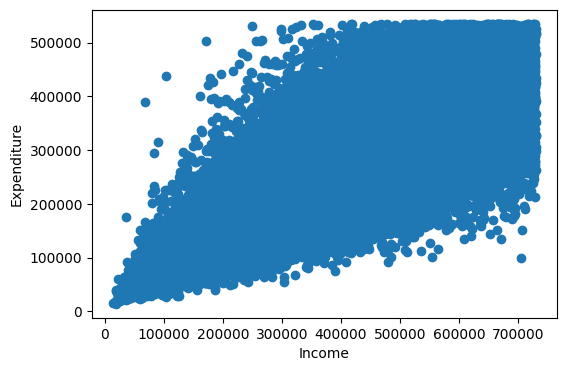

In [155]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(removed_outliers['Hhld, Income, Total'], removed_outliers['Hhld, Expenditures, Total'])
ax.set_xlabel('Income')
ax.set_ylabel('Expenditure')
plt.show()

The outliers are now removed.


There is a column named Unnamed_13 in the dataset. We opted to total the unnamed column and other sources of income NEC because the unnamed column contributes to the total income of the household as some of the total income were inaccurate if the unnamed column wans't included


In [156]:
imputted_column_13 = removed_outliers.copy()
imputted_column_13['Other Sources of Income NEC'] = imputted_column_13['Other Sources of Income NEC'] + imputted_column_13['Unnamed: 13']
print("Number of columns before dropping:", imputted_column_13.shape[1])
imputted_column_13.drop(columns=['Unnamed: 13'], inplace=True)
print("Number of columns after dropping:", imputted_column_13.shape[1])

Number of columns before dropping: 91
Number of columns after dropping: 90


# 5. Quantitative Statistics


## Generate statistics and provide EDA. Provide illustration


# 6. Application of Proximity (Distance Analysis)


## Check for correlation. Provide illustration.


## Calculate a distance matrix (e.g., Euclidean distance) for numeric data as required. Provide illustration


# 7. Data Mining: Association Rule Mining


## If needed, transform the dataset (one-hot encoding) and apply the Apriori algorithm to extract association rules.


In [157]:
income_column = "Per Capita Income"
decile_column = "NPCINC"

income_stats = imputted_column_13.groupby(decile_column)[income_column].agg(['min', 'max']).reset_index()

income_stats

,NPCINC,min,max
0,1,5240.000000,32117.500000
1,2,32117.500000,41275.199219
2,3,41276.000000,50114.800781
3,4,50116.250000,59848.332031
4,5,59848.750000,71350.000000
5,6,71350.000000,85297.500000
6,7,85299.000000,104617.500000
7,8,104620.000000,134370.000000
8,9,134372.500000,193324.000000
9,10,193333.328125,729340.000000


## Per Capita Income, Total nonfood, total food, family size

In [158]:
# import pandas as pd
# from mlxtend.frequent_patterns import fpgrowth, association_rules


# # low, medium, high for necessities
# lmh_columns = [
#     "Total Non-Food Expenditure", "Hhld, Food",
# ]

# categorical_columns = ["Family Size", "NPCINC"]

# df_filtered = imputted_column_13[lmh_columns + categorical_columns].copy()

# df_filtered


In [159]:


# # Convert Low/Medium/High using percentiles
# def categorize_lmh(value, quantiles):
#     if value <= quantiles[0.33]:
#         return "Low"
#     elif value <= quantiles[0.66]:
#         return "Medium"
#     else:
#         return "High"

# for col in lmh_columns:
#     quantiles = df_filtered[col].quantile([0.33, 0.66]).to_dict()
#     df_filtered[col] = df_filtered[col].apply(lambda x: categorize_lmh(x, quantiles))

# # Convert Family Size to Small/Medium/Large
# def categorize_family_size(size):
#     if size <= 3:
#         return "Small"
#     elif size <= 6:
#         return "Medium"
#     else:
#         return "Large"

# df_filtered["Family Size"] = df_filtered["Family Size"].apply(categorize_family_size)

# def categorize_npcinc(decile):
#     if decile <= 3:
#         return "Low"
#     elif decile <= 7:
#         return "Medium"
#     else:
#         return "High"

# df_filtered["NPCINC"] = df_filtered["NPCINC"].apply(categorize_npcinc)

In [160]:
# # Step 6: One-Hot Encode Categorical Columns (LMH + Family Size + NPCINC)
# df_encoded = pd.get_dummies(df_filtered, columns=lmh_columns + categorical_columns)

# # Step 7: Apply FP-Growth
# min_support = 0.07  # Adjust as needed
# frequent_itemsets = fpgrowth(df_encoded, min_support=min_support, use_colnames=True)

# # Step 8: Generate Association Rules
# rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# # Step 9: Save results
# #frequent_itemsets.to_csv("frequent_itemsets_filtered2.csv", index=False)
# #rules.to_csv("association_rules_filtered2.csv", index=False)

## Per capita income with food 1

In [161]:


# # low, medium, high for necessities
# lmh_columns_food1 = [
#     "Cereal and Cereal Preparations (Total)", "Meat and Meat Preparations",
#     "Fish and Marine Products (Total)", "Dairy Products and Eggs (Total)", "Oils and Fats (Total)", "Fruits and Vegetables", "Vegetables (Total)", "Sugar, Jam and Honey (Total)"
# ]

# categorical_columns = ["Family Size", "NPCINC"]

# df_filtered = imputted_column_13[lmh_columns_food1 + categorical_columns].copy()

# # Convert Low/Medium/High using percentiles
# def categorize_lmh(value, quantiles):
#     if value <= quantiles[0.33]:
#         return "Low"
#     elif value <= quantiles[0.66]:
#         return "Medium"
#     else:
#         return "High"

# for col in lmh_columns_food1:
#     quantiles = df_filtered[col].quantile([0.33, 0.66]).to_dict()
#     df_filtered[col] = df_filtered[col].apply(lambda x: categorize_lmh(x, quantiles))

# # Convert Family Size to Small/Medium/Large
# def categorize_family_size(size):
#     if size <= 3:
#         return "Small"
#     elif size <= 6:
#         return "Medium"
#     else:
#         return "Large"

# df_filtered["Family Size"] = df_filtered["Family Size"].apply(categorize_family_size)

# def categorize_npcinc(decile):
#     if decile <= 3:
#         return "Low"
#     elif decile <= 7:
#         return "Medium"
#     else:
#         return "High"

# df_filtered["NPCINC"] = df_filtered["NPCINC"].apply(categorize_npcinc)

# # Step 6: One-Hot Encode Categorical Columns (LMH + Family Size + NPCINC)
# df_encoded = pd.get_dummies(df_filtered, columns=lmh_columns_food1 + categorical_columns)

# # Step 7: Apply FP-Growth
# min_support = 0.05  # Adjust as needed
# frequent_itemsets = fpgrowth(df_encoded, min_support=min_support, use_colnames=True)

# # Step 8: Generate Association Rules
# rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# # Step 9: Save results
# # frequent_itemsets.to_csv("frequent_itemsets_food1_lower_th.csv", index=False)
# # rules.to_csv("association_rules_food1_lower_th.csv", index=False)

## Per capita income with Food 2

In [162]:


# # low, medium, high for necessities
# lmh_columns_food1 = [
#     "Food Not Elsewhere Classified (Total)", "Fruit and vegetable juices",
#     "Coffee, Cocoa and Tea (Total)", "Tea (total)  expenditure", "Cocoa (total)  expenditure", "Main Source of Water Supply (2nd visit only)", "Softdrinks", "Other Non Alcoholic Beverages"
# ]

# categorical_columns = ["Family Size", "NPCINC"]

# df_filtered = imputted_column_13[lmh_columns_food1 + categorical_columns].copy()

# # Convert Low/Medium/High using percentiles
# def categorize_lmh(value, quantiles):
#     if value <= quantiles[0.33]:
#         return "Low"
#     elif value <= quantiles[0.66]:
#         return "Medium"
#     else:
#         return "High"

# for col in lmh_columns_food1:
#     quantiles = df_filtered[col].quantile([0.33, 0.66]).to_dict()
#     df_filtered[col] = df_filtered[col].apply(lambda x: categorize_lmh(x, quantiles))

# # Convert Family Size to Small/Medium/Large
# def categorize_family_size(size):
#     if size <= 3:
#         return "Small"
#     elif size <= 6:
#         return "Medium"
#     else:
#         return "Large"

# df_filtered["Family Size"] = df_filtered["Family Size"].apply(categorize_family_size)

# def categorize_npcinc(decile):
#     if decile <= 3:
#         return "Low"
#     elif decile <= 7:
#         return "Medium"
#     else:
#         return "High"

# df_filtered["NPCINC"] = df_filtered["NPCINC"].apply(categorize_npcinc)

# # Step 6: One-Hot Encode Categorical Columns (LMH + Family Size + NPCINC)
# df_encoded = pd.get_dummies(df_filtered, columns=lmh_columns_food1 + categorical_columns)

# # Step 7: Apply FP-Growth
# min_support = 0.05  # Adjust as needed
# frequent_itemsets = fpgrowth(df_encoded, min_support=min_support, use_colnames=True)

# # Step 8: Generate Association Rules
# rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# # Step 9: Save results
# #frequent_itemsets.to_csv("frequent_itemsets_food2.csv", index=False)
# #rules.to_csv("association_rules_food2.csv", index=False)

## home vs outside per capita income

In [163]:



# # low, medium, high for necessities
# lmh_columns_home_vs_outside = [
#     "Total Food Consumed at Home (Total)", "Food Regularly Consumed Outside The Home (Total)"
# ]

# categorical_columns = ["Family Size", "NPCINC"]

# df_filtered = imputted_column_13[lmh_columns_home_vs_outside + categorical_columns].copy()

# # Convert Low/Medium/High using percentiles
# def categorize_lmh(value, quantiles):
#     if value <= quantiles[0.33]:
#         return "Low"
#     elif value <= quantiles[0.66]:
#         return "Medium"
#     else:
#         return "High"

# for col in lmh_columns_home_vs_outside:
#     quantiles = df_filtered[col].quantile([0.33, 0.66]).to_dict()
#     df_filtered[col] = df_filtered[col].apply(lambda x: categorize_lmh(x, quantiles))

# # Convert Family Size to Small/Medium/Large
# def categorize_family_size(size):
#     if size <= 3:
#         return "Small"
#     elif size <= 6:
#         return "Medium"
#     else:
#         return "Large"

# df_filtered["Family Size"] = df_filtered["Family Size"].apply(categorize_family_size)

# def categorize_npcinc(decile):
#     if decile <= 3:
#         return "Low"
#     elif decile <= 7:
#         return "Medium"
#     else:
#         return "High"

# df_filtered["NPCINC"] = df_filtered["NPCINC"].apply(categorize_npcinc)

# # Step 6: One-Hot Encode Categorical Columns (LMH + Family Size + NPCINC)
# df_encoded = pd.get_dummies(df_filtered, columns=lmh_columns_home_vs_outside + categorical_columns)

# # Step 7: Apply FP-Growth
# min_support = 0.05  # Adjust as needed
# frequent_itemsets = fpgrowth(df_encoded, min_support=min_support, use_colnames=True)

# # Step 8: Generate Association Rules
# rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# # Step 9: Save results
# #frequent_itemsets.to_csv("frequent_itemsets_food_total.csv", index=False)
# #rules.to_csv("association_rules_food_total.csv", index=False)

## Sources of Income vs Total Expenditures

In [164]:
# import pandas as pd
# from mlxtend.frequent_patterns import fpgrowth, association_rules

# # binary columns for miscellaneous expenses
# binary_columns = [
#     "Salaries/Wages from Regular Employment", "Salaries/Wages from Seasonal Employment", 
#     "Net Share of Crops, Fruits, etc. (Tot. Net Value of Share)", "Cash Receipts, Support, etc. from Abroad", "Cash Receipts, Support, etc. from Domestic Source",
#     "Rentals Received from Non-Agri Lands, etc.", "Pension and Retirement Benefits", 
#     "Dividends from Investment", "Other Sources of Income NEC", 
#     "Family Sustenance Activities", "Total Received as Gifts", "Hhld, Income from Entrepreneurial Activities, Total",
#     "Imputed House Rental Value", "Other Receipts"
# ]

# # low, medium, high for necessities
# lmh_columns = [
#     "Total Household Disbursements"
# ]

# df_filtered = imputted_column_13[binary_columns + lmh_columns].copy()

# df_filtered

# df_filtered[binary_columns] = df_filtered[binary_columns].applymap(lambda x: 1 if x > 0 else 0)

# # Convert Low/Medium/High using percentiles
# def categorize_lmh(value, quantiles):
#     if value <= quantiles[0.33]:
#         return "Low"
#     elif value <= quantiles[0.66]:
#         return "Medium"
#     else:
#         return "High"

# for col in lmh_columns:
#     df_filtered[col] = pd.to_numeric(df_filtered[col], errors='coerce')
    
#     # Drop NaNs before computing quantiles
#     quantiles = df_filtered[col].dropna().quantile([0.33, 0.66]).to_dict()
    
#     # Apply categorization
#     df_filtered[col] = df_filtered[col].apply(lambda x: categorize_lmh(x, quantiles) if pd.notna(x) else "Unknown")


# # Step 6: One-Hot Encode Categorical Columns (LMH + Family Size + NPCINC)
# df_encoded = pd.get_dummies(df_filtered, columns=lmh_columns)

# # Step 7: Apply FP-Growth
# min_support = 0.05  # Adjust as needed
# frequent_itemsets = fpgrowth(df_encoded, min_support=min_support, use_colnames=True)

# # Step 8: Generate Association Rules
# rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# # Step 9: Save results
# frequent_itemsets.to_csv("frequent_itemsets_sources.csv", index=False)
# rules.to_csv("association_rules_sources.csv", index=False)

## All the expenditures

In [165]:
# import pandas as pd
# from mlxtend.frequent_patterns import fpgrowth, association_rules

# # binary columns for miscellaneous expenses
# binary_columns = [
#     "Alcoholic Beverages (Total)", "Tobacco (Total)", 
#     "Other Vegetables (Total)", "Services_Primary_Goods", "Alcohol Procduction Services",
#     "Clothing, Footwear and Other Wear", "Recreation and Culture (Total)", 
#     "Insurance", "Miscellaneous Goods and Services (Total)", 
#     "Durable Furniture", "Special Family Occasion", "Other Expenditure (inc. Value Consumed, Losses)",
#     "Accomodation Services", "Furnishings, Household Equipment & Routine Household Mainte"
# ]

# # low, medium, high for necessities
# lmh_columns = [
#     "Housing and water (Total)", "House Rent/Rental Value",
#     "Health (Total)", "Transportation (Total)", "Communication (Total)", "Education (Total)"
# ]

# categorical_columns = ["Family Size", "NPCINC"]

# df_filtered = imputted_column_13[binary_columns + lmh_columns + categorical_columns].copy()

# df_filtered

# df_filtered[binary_columns] = df_filtered[binary_columns].applymap(lambda x: 1 if x > 0 else 0)

# # Convert Low/Medium/High using percentiles
# def categorize_lmh(value, quantiles):
#     if value <= quantiles[0.33]:
#         return "Low"
#     elif value <= quantiles[0.66]:
#         return "Medium"
#     else:
#         return "High"

# for col in lmh_columns:
#     quantiles = df_filtered[col].quantile([0.33, 0.66]).to_dict()
#     df_filtered[col] = df_filtered[col].apply(lambda x: categorize_lmh(x, quantiles))

# # Convert Family Size to Small/Medium/Large
# def categorize_family_size(size):
#     if size <= 3:
#         return "Small"
#     elif size <= 6:
#         return "Medium"
#     else:
#         return "Large"

# df_filtered["Family Size"] = df_filtered["Family Size"].apply(categorize_family_size)

# def categorize_npcinc(decile):
#     if decile <= 3:
#         return "Low"
#     elif decile <= 7:
#         return "Medium"
#     else:
#         return "High"

# df_filtered["NPCINC"] = df_filtered["NPCINC"].apply(categorize_npcinc)

# # Step 6: One-Hot Encode Categorical Columns (LMH + Family Size + NPCINC)
# df_encoded = pd.get_dummies(df_filtered, columns=lmh_columns + categorical_columns)

# # Step 7: Apply FP-Growth
# min_support = 0.05  # Adjust as needed
# frequent_itemsets = fpgrowth(df_encoded, min_support=min_support, use_colnames=True)

# # Step 8: Generate Association Rules
# rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# # Step 9: Save results
# frequent_itemsets.to_csv("frequent_itemsets_nonfood.csv", index=False)
# rules.to_csv("association_rules_nonfood.csv", index=False)

## Necessities and Non necessities

In [ ]:
# import pandas as pd
# from mlxtend.frequent_patterns import fpgrowth, association_rules

# Define column groups
# nonnecessities_columns = [
#     "Alcoholic Beverages (Total)", "Tobacco (Total)", 
#     "Other Vegetables (Total)", "Services_Primary_Goods", "Alcohol Procduction Services",
#     "Clothing, Footwear and Other Wear", "Recreation and Culture (Total)", 
#     "Insurance", "Miscellaneous Goods and Services (Total)", 
#     "Durable Furniture", "Special Family Occasion", "Other Expenditure (inc. Value Consumed, Losses)",
#     "Accomodation Services", "Furnishings, Household Equipment & Routine Household Mainte"
# ]

# necessities_columns = [
#     "Housing and water (Total)", "House Rent/Rental Value",
#     "Health (Total)", "Transportation (Total)", "Communication (Total)", "Education (Total)"
# ]

# categorical_columns = ["NPCINC"]

# # 1️⃣ Load relevant columns
# df_filtered = imputted_column_13[nonnecessities_columns + necessities_columns + categorical_columns].copy()

# # 2️⃣ Convert Non-Necessities and Necessities into Total Spending
# df_filtered["Non-Necessities Total"] = df_filtered[nonnecessities_columns].sum(axis=1)
# df_filtered["Necessities Total"] = df_filtered[necessities_columns].sum(axis=1)

# # 3️⃣ Drop original columns (only if they exist to avoid errors)
# existing_columns = set(df_filtered.columns)
# columns_to_drop = [col for col in (nonnecessities_columns + necessities_columns) if col in existing_columns]
# df_filtered.drop(columns=columns_to_drop, inplace=True)

# # 4️⃣ Categorize Non-Necessities and Necessities into Low/Medium/High
# def categorize_lmh(value, quantiles):
#     if value <= quantiles[0.33]:
#         return "Low"
#     elif value <= quantiles[0.66]:
#         return "Medium"
#     else:
#         return "High"

# for col in ["Non-Necessities Total", "Necessities Total"]:
#     quantiles = df_filtered[col].quantile([0.33, 0.66]).to_dict()
#     df_filtered[col] = df_filtered[col].apply(lambda x: categorize_lmh(x, quantiles))

# # 5️⃣ Categorize NPCINC into Low/Medium/High
# def categorize_npcinc(decile):
#     if decile <= 3:
#         return "Low"
#     elif decile <= 7:
#         return "Medium"
#     else:
#         return "High"

# df_filtered["NPCINC"] = df_filtered["NPCINC"].apply(categorize_npcinc)

# # 6️⃣ One-Hot Encode Categorical Columns
# df_encoded = pd.get_dummies(df_filtered, columns=["Non-Necessities Total", "Necessities Total", "NPCINC"])

# # 7️⃣ Apply FP-Growth
# min_support = 0.02  # Adjust as needed
# frequent_itemsets = fpgrowth(df_encoded, min_support=min_support, use_colnames=True)

# # 8️⃣ Generate Association Rules
# rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# # 9️⃣ Save Results
# frequent_itemsets.to_csv("frequent_itemsets_necessities.csv", index=False)
# rules.to_csv("association_rules_necessities.csv", index=False)

# print("✅ Process complete! Frequent itemsets and association rules saved.")


✅ Process complete! Frequent itemsets and association rules saved.


## Expenditure (necessities) categories vs Per Capita income (national)

In [169]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules


# low, medium, high for necessities
lmh_columns = [
    "Housing and water (Total)", "House Rent/Rental Value",
    "Health (Total)", "Transportation (Total)", "Communication (Total)", "Education (Total)"
]

categorical_columns = ["NPCINC"]

df_filtered = imputted_column_13[lmh_columns + categorical_columns].copy()

# Convert Low/Medium/High using percentiles
def categorize_lmh(value, quantiles):
    if value <= quantiles[0.33]:
        return "Low Spending"
    elif value <= quantiles[0.66]:
        return "Medium Spending"
    else:
        return "High Spending"

for col in lmh_columns:
    quantiles = df_filtered[col].quantile([0.33, 0.66]).to_dict()
    df_filtered[col] = df_filtered[col].apply(lambda x: categorize_lmh(x, quantiles))

def categorize_npcinc(decile):
    if decile <= 3:
        return "Low"
    elif decile <= 7:
        return "Medium"
    else:
        return "High"

df_filtered["NPCINC"] = df_filtered["NPCINC"].apply(categorize_npcinc)

# Step 6: One-Hot Encode Categorical Columns (LMH + Family Size + NPCINC)
df_encoded = pd.get_dummies(df_filtered, columns=lmh_columns + categorical_columns)

# Step 7: Apply FP-Growth
min_support = 0.05  # Adjust as needed
frequent_itemsets = fpgrowth(df_encoded, min_support=min_support, use_colnames=True)

# Step 8: Generate Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Step 9: Save results
frequent_itemsets.to_csv("frequent_itemsets_necessities_categories.csv", index=False)
rules.to_csv("association_rules_necessities_categories.csv", index=False)